
### Link to Source Code 
[Here](https://github.com/Xianzhiwang1/CS0451-page-site/tree/main/posts/my-blog-post-04-linear-regress) is a link to the source code for this perceptron blog post.
### Link to reference for this blog post
[Here](https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-linear-regression.html) is a link to the main reference we use as we implement our linear regression model.

### Introduction
In this blog post I am going to discuss Linear Regression. 




Before we start the implementation, we first record the following code snippet that will help us to automatically load our source code when we are in the editing phase.

In [1]:
%load_ext autoreload
%autoreload 2

First, let's import some libraries, then we perform our `fit_gradient` and `fit_analytic` on the following simple data set with only one features to visualize our linear regression.

In [49]:
import numpy as np
np.random.seed(42)
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 78 
plt.rcParams['savefig.dpi'] = 156 
plt.rcParams['figure.figsize'] = [3, 4]
from linear_regression import LinearRegression 

### Fitting Linear Regression using gradient descent; a.k.a. `fit_gradient`
In `fit_gradient`, the key step is to compute the gradient using a descent algorithm so that we could solve the following problem:
$$ \hat{w} = \arg \min_{w} L(w). $$ 
Equivalently, we could unpact this equation:
$$ \hat{w} = \sum_{i=1}^{n} \ell(\hat{y}_i, y_i) = \argmin_{w} \sum_{i=1}^{n} ( \langle w, x_i \rangle - y_i)^2.$$
Recall that our loss function is of the form $ \ell(\hat{y}, y) = (\hat{y}-y)^2 $ since we are using ordinary least square regression. 


We start by taking derivative with respect to $w.$ Using chain rule for matrices, we obtain the following expression:
$$ \nabla L(w) = 2 X^{T}(X\cdot w -y).$$
Then, we use gradient descent to find the $w$ that is "good enough." We achieve this by the following iteration:
$$ w^{(t+1)} \leftarrow w^{(t)} - 2 \cdot \alpha \cdot X^{T} (X \cdot w^{(t)} - y).$$


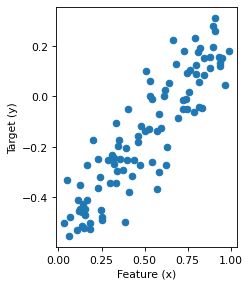

In [53]:
# We start by generate a small data set.
w0 = -0.5
w1 =  0.7

n = 100
x = np.random.rand(n, 1)
y = w1*x + w0 + 0.1*np.random.randn(n, 1)

plt.scatter(x, y)
labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")

We are able to generate data and visualize this problem when `p_features = 1`. Graphically, we are trying to draw a line "of best fit" through the data points in the sense of OLS, which stands for Ordinary Least Squares. The line we draw just means given the feature `x`, we find the corresponding predicted `y` using the line, which will be close to the original `y`, if we have done a good job.

In [21]:
LR1 = LinearRegression()
X_ = LR1.pad(x)
LR1.fit_gradient(X_, y)


After importing `linear_regression.py`, we could call the `fit_gradient` method that implements the gradient descent algorithm for us, as illustrated in the above cell. In the following cell, we plot the "line of best fit" using the weights `LR1.w` that we obtained after running `fit_gradient`. 

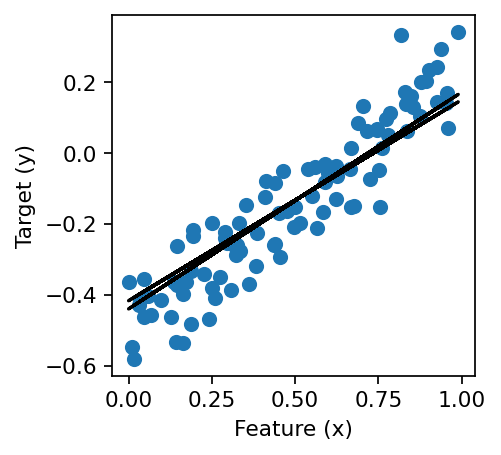

In [22]:
plt.scatter(x, y)
plt.plot(x, X_@LR1.w, color = "black")
labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")

### Fitting Linear Regression using a analytic formula; a.k.a. `fit_analytic`
Similarly to `fit_gradient`, we also have a method called `fit_analytic`, which uses a formula to compute the weights `w` exactly, and this is implemented using the followiing equation:
$$ \hat{w} = (X^T X)^{-1} X^T y, $$ 
where $\hat{w}$ denotes the weights we obtained after calling the function `fit_analytic`. Note that in order for this formula to make sense, we need `X` to be a invertible matrix. Now, with the math part out of the way, let's see this in action using the following code:

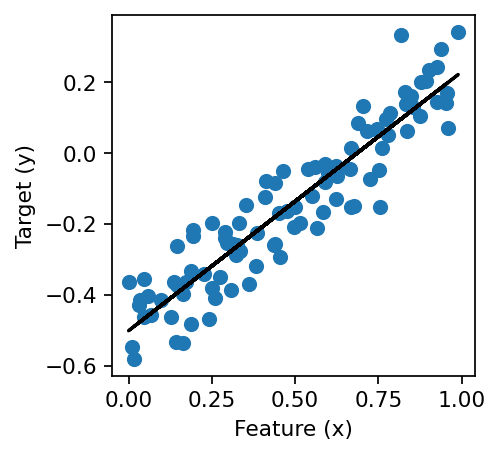

In [23]:
LR = LinearRegression()
X_ = LR.pad(x)
LR.fit_analytic(X_,y)
plt.scatter(x, y)
plt.plot(x, X_@LR.w, color = "black")
labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")

### More than one feature
Now we use the following function to create both testing and validation data. At this stage, we could experiment with more features. 

When the number of features is one, `p_features = 1`, we could plot the artificial training data set and the validation data set. We lose this luxury when we have 2 or more features. 

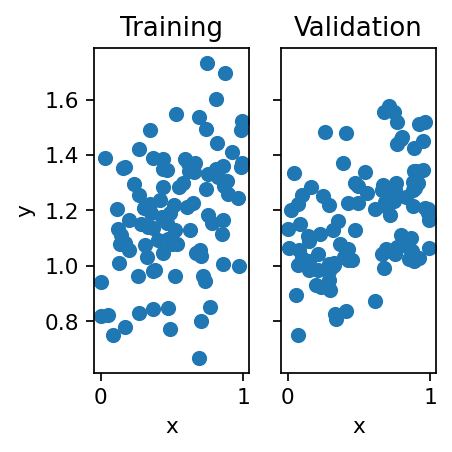

In [24]:
n_train = 100
n_val = 100
p_features = 1 
noise = 0.2

# create some data
LR = LinearRegression()
X_train, y_train, X_val, y_val = LR.LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

Now we experiment with the number of features being `n_train - 1`, which quite a lot features. 

In [9]:

n_train = 100
n_val = 100
p_features = n_train - 1 
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR.LR_data(n_train, n_val, p_features, noise)


[0.63670274 0.80630268 0.35513237 0.91438401 1.16299646 0.25471538
 0.41929398 0.33128811 0.20562377 1.01101763 1.03533991 0.52161055
 1.06408515 0.97373593 0.90195551 0.66708621 1.0553234  0.9038803
 0.61806445 0.98863527 0.28500621 0.71033293 0.3895933  1.16001778
 0.40914841 0.56370937 1.11308954 0.7595861  0.25039412 0.32132671
 0.37317078 0.34757871 0.35170662 0.21077583 1.07547584 1.13214022
 0.24784227 0.50182363 0.50983977 1.10205703 0.44692467 0.34827051
 0.50807989 0.57485158 1.11593703 0.30167099 1.03100803 0.43282352
 0.97354337 0.82979848 0.22099813 0.44731208 0.81564771 0.59497909
 0.29111052 0.53750411 0.79428553 0.58251937 1.15713839 0.31408165
 0.59708775 0.81603557 0.9006841  1.06787209 0.8839062  0.48405233
 0.98376161 1.12966603 1.16950196 0.73324542 0.49236504 0.34219561
 0.40279833 0.3268641  0.55424444 0.69369508 0.64131131 0.37501194
 0.52423439 0.78499193 0.34587613 0.82398686 0.88436386 1.0896536
 0.92725116 0.54739758 0.80205799 1.12189711 0.32002073 1.017330

Here's the snippets within the `fit_gradient` function that makes the same code work for different number of features: 

`features = X_.shape[1]`

`self.w = np.random.rand(features)`

In [10]:
from linear_regression import LinearRegression 
LR = LinearRegression()
X_train_ = LR.pad(X_train)
X_val_ = LR.pad(X_val)
LR.fit_analytic(X_train_, y_train) # I used the analytical formula as my default fit method
print(f"Training score = {LR.score(X_train_, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val_, y_val).round(4)}")

Training score = 1.0
Validation score = -28.9927


In [11]:
# The estimated weight vector w is
print(LR.w)
print(f"Training Loss = {LR.Big_L(X_train_, y_train).round(2)}")
print(f"Validation Loss = {LR.Big_L(X_val_, y_val).round(2)}")


[ -6.98654837  -5.11475728   8.57443208   5.07362523  -4.87413305
   1.56026393   0.72491913   6.30882348   2.53666501  -4.92871486
  -0.34034587   1.59120555  -2.528114    -2.78795259   5.15328034
   4.27929691   4.4974397    0.49911716   5.42071211   3.08095628
   0.73021938   3.88593999  -1.4181669    9.13986037   9.40915052
  -0.31260307  -2.27939577  -2.28677311   2.2816238    0.13271794
  -6.15093261  -2.76268557   0.66617876  -1.72896585  -3.63483613
   1.79880844   0.06002997   1.63561401   3.63579881   2.83111064
  -0.01094197   2.07372372   1.00556763  -7.67616558   7.44297791
   5.04437298   4.30471381   0.77607148   4.81262528   4.81503507
   0.21150729   1.84560229  -2.0094033   10.22625218   6.35957177
   2.24820699  -3.27148277   4.4020253   -3.85757669  -1.47929074
  -1.47511316   3.41494346   1.51279448 -10.41771156   1.96379535
  -1.16326796  -3.74895009   1.55522698   1.72993542  -3.15904913
  -2.15681793  -2.46951596  -3.10286333  -2.54008191  10.34623135
   8.09693

[-0.20674413  0.12084117  0.57888575  0.10695928  0.3733441   1.53368573
  0.32909533  2.19548408  0.35743443  0.84050323 -0.35876475  0.02140112
  0.82346882  0.35922347  0.82526183  1.52828547  0.89941016 -0.50593451
  0.15769917  0.17178843  1.04108492  0.22669827 -0.36448125  1.15371632
  1.06980962  0.14919761  0.1489406   1.26635475  0.57680149  0.86882031
  1.92894308  0.15563199  1.27118457  1.15114506  0.37997635  0.24154142
  0.34591701  2.02346507  1.19253636  1.54006147  0.7682607   0.10483456
  1.22761859  0.89395795  0.08145398 -0.2297801   1.18426365 -0.08806117
  1.68563933  1.60796234 -0.3256804  -0.11730305  0.41853193  1.5334774
 -1.01472514  0.32646328 -0.14053296  1.00740866  1.04385105  0.98986568
  0.05197086 -0.16415203  0.77044747  0.26846784  0.82958642  0.59342176
  0.2997246  -0.181763    1.20827012  0.58855747 -0.13635831  1.0821288
  0.55542882  0.9743686   0.83504526 -0.01698154  0.64567474  1.09707975
  1.38820026  0.61133771  0.34974516  1.17627146  0.6

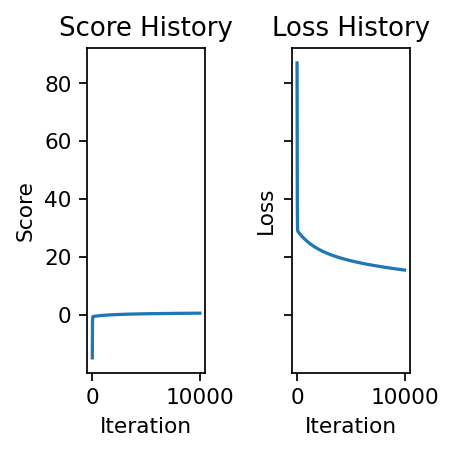

In [16]:
LR2 = LinearRegression()

LR2.fit_gradient(X_train_, y_train)
print(LR2.w)
print(f"Training score = {LR2.score(X_train_, y_train).round(4)}")
print(f"Validation score = {LR2.score(X_val_, y_val).round(4)}")

# plt.plot(LR2.score_history)
# labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].plot(LR2.score_history)
axarr[1].plot(LR2.loss_history)
labs = axarr[0].set(title = "Score History", xlabel = "Iteration", ylabel = "Score")
labs = axarr[1].set(title = "Loss History", xlabel = "Iteration", ylabel = "Loss")
plt.tight_layout()

### LASSO Regularization
In this last section, we use a modified loss function of the following expression:
$$ L(w) = \lVert X \cdot w -y \rVert ^2_2 + \sum_{j=1}^{p-1} \alpha \cdot | w_j | $$

In [13]:
from sklearn.linear_model import Lasso
L = Lasso(alpha = 0.001)

In [28]:

n_train = 30 
n_val = 30
p_features = 1 
noise = 0.2
p_features = n_train - 1
X_train, y_train, X_val, y_val = LR.LR_data(n_train, n_val, p_features, noise)
L.fit(X_train, y_train)
L.score(X_val, y_val)

0.557327771070066

In [54]:
LR4 = LinearRegression()
LR4.lasso_score(n_train, n_val, noise)
LR4.lin_regress_score(n_train, n_val, noise)

/Users/xianzhiwang/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.416e-02, tolerance: 3.952e-02
  model = cd_fast.enet_coordinate_descent(
/Users/xianzhiwang/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.083e-02, tolerance: 5.877e-02
  model = cd_fast.enet_coordinate_descent(
/Users/xianzhiwang/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

KeyboardInterrupt: 

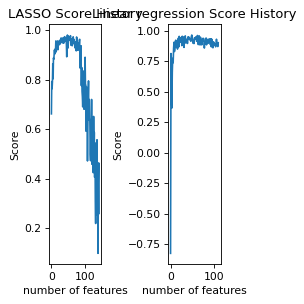

In [56]:
fig, axarr = plt.subplots(1, 2, sharex = False, sharey = False)
axarr[0].plot(LR4.lasso_score_history)
axarr[1].plot(LR4.fit_gradient_score_history)
labs = axarr[0].set(title = "LASSO Score History", xlabel = "number of features", ylabel = "Score")
labs = axarr[1].set(title = "Linear regression Score History", xlabel = "number of features", ylabel = "Score")
plt.tight_layout()

In [57]:
print(LR4.lasso_score_history)
print(LR4.fit_gradient_score_history)

[0.6620134086527454, 0.7926652719544164, 0.7636216364918889, 0.7909619588951335, 0.8645992981586434, 0.8035728463544629, 0.8876763854143038, 0.8825528989471548, 0.8999645997553866, 0.9204144321545072, 0.9036502575751295, 0.9238042101891167, 0.9130491832790616, 0.9564958075480152, 0.9123523996274471, 0.9481736724093577, 0.9408155633323741, 0.9531214026635366, 0.9565368685279597, 0.9207839048724966, 0.9408003015258696, 0.9392737935629251, 0.946157051544213, 0.956997646406508, 0.9421334731115686, 0.9597226602720572, 0.9463221520441731, 0.9538853236888134, 0.9680544210629696, 0.9624507331053962, 0.9666915821265389, 0.9572390152046465, 0.9486495579876864, 0.9676815675127243, 0.9524032529564634, 0.9675283275131255, 0.9472936616302995, 0.970347778989878, 0.9665539116544122, 0.9738129521335204, 0.9555171068252105, 0.9612870258755014, 0.9671522961768058, 0.9659453362023974, 0.945242931456526, 0.8923291792428418, 0.968511774255436, 0.9803940514695835, 0.9532468095489877, 0.9279866466777582, 0.97